In [1]:
import pandas as pd
from gensim.models.wrappers import FastText

In [2]:
fb_model = FastText.load_fasttext_format('D:/Khalil/university/cross/cc.en.300.bin')

In [4]:
fb_model.most_similar('Joule')

[('joule', 0.6378939747810364),
 ('Joules', 0.5253655314445496),
 ('joules', 0.506077766418457),
 ('Ampere', 0.4647129774093628),
 ('Faradays', 0.4523390829563141),
 ('Clausius', 0.44955891370773315),
 ('Faraday', 0.44298309087753296),
 ('Carnot', 0.43097081780433655),
 ('Ohm', 0.4266015887260437),
 ('Kilowatt', 0.426177054643631)]

In [3]:
#This method will calculate the similarity score for us
def get_jaccard_similarity(S1,S2):
    if len(S1) == 0 and len(S2) == 0:
        return 0
    else:
        return len(S1.intersection(S2)) / len(S1.union(S2))
#This method will calculate the similarity score for us
def get_dice_similarity(S1,S2):
    if len(S1) == 0 and len(S2) == 0:
        return 0
    else:
        return 2 * ( len(S1.intersection(S2)) / (len(S1) + len(S2)))
#This method will calculate the similarity score for us
def get_overlap_similarity(S1,S2):
    if len(S1) == 0 or len(S2) == 0:
        return 0
    else:
        return len(S1.intersection(S2)) / min((len(S1) , len(S2)))
#This method will calculate the similarity score for us
def get_containment_similarity(S1,S2):
    if len(S1) == 0:
        return 0
    else:
        return len(S1.intersection(S2)) / len(S1)

In [4]:
def get_augmented_fb_set_different_length(word):
    list_output = get_augmented_fb_list(word)
    return  [set  (list_output[:1]), set (list_output[:2]),
             set ( list_output[:3]) , set ( list_output[:4]) ,
             set ( list_output[:5]) , set ( list_output) ]

def get_augmented_fb_list(word):
    word = word.lower()
    list_of_word = []
    data_from_google_model = []
    try: 
        data_from_google_model = fb_model.most_similar(word)
    except:
        data_from_google_model = []
        
    for sim_set in data_from_google_model:
        list_of_word.append(sim_set[0])
    # print(list_of_word)
    # print(set(list_of_word))
    list_of_word = [item.lower() for item in list_of_word]
    list_of_word = [x for x in list_of_word if x != word]
    return list_of_word

In [5]:
def get_augmented_fb_set(word):
    word = word.lower()
    list_of_word = []
    data_from_google_model = []
    try: 
        data_from_google_model = fb_model.most_similar(word)
    except:
        data_from_google_model = []
        
    for sim_set in data_from_google_model:
        list_of_word.append(sim_set[0])
    # print(list_of_word)
    # print(set(list_of_word))
    list_of_word = [item.lower() for item in list_of_word]
    list_of_word = [x for x in list_of_word if x != word]
    return set(list_of_word)

In [6]:
def get_fb_similarity(W1 , W2):
    try: 
        return fb_model.similarity(W1,W2)
    except:
        return 0

In [9]:
eng_word1_aug = get_augmented_fb_set_different_length("English")
eng_word1_aug

[{'engish'},
 {'engish', 'englsih'},
 {'engish', 'englsih', 'enlish'},
 {'engish', 'englis', 'englsih', 'enlish'},
 {'engish', 'englis', 'english-', 'englsih', 'enlish'},
 {'engish', 'englis', 'english-', 'english.i', 'englsih', 'enlish', 'spanish'}]

In [7]:
given_data = pd.read_excel('Cross Lingual dataset.xlsx')
given_data.shape

(1000, 4)

In [8]:
given_data.head()

,Word 1,Word 2,score,Word 2 Translation
0,Joule,خلائی جہاز,0.58,spacecraft
1,Promised Land,باکو,0.42,Baku
2,car,سائیکل,2.83,bicycle
3,polyhedron,اداکار,0.00,actor
4,multiple sclerosis,ایم ایس,3.92,MS


In [9]:
for i in range(1 , 7):
#     print("English Word 1 AL" + i)
    given_data[ "English Word 1 AL"+str(i) ] = ''
    given_data[ "English Word 2 AL"+str(i) ] = ''
    given_data['Jaccard A'+str(i)] = ''
    given_data['Dice A'+str(i)] = ''
    given_data['Overlap A'+str(i)] = ''
    given_data['Containment A'+str(i)] = ''
given_data.head()

,Word 1,Word 2,score,Word 2 Translation,English Word 1 AL1,English Word 2 AL1,Jaccard A1,Dice A1,Overlap A1,Containment A1,...,Jaccard A5,Dice A5,Overlap A5,Containment A5,English Word 1 AL6,English Word 2 AL6,Jaccard A6,Dice A6,Overlap A6,Containment A6
0,Joule,خلائی جہاز,0.58,spacecraft,,,,,,,...,,,,,,,,,,
1,Promised Land,باکو,0.42,Baku,,,,,,,...,,,,,,,,,,
2,car,سائیکل,2.83,bicycle,,,,,,,...,,,,,,,,,,
3,polyhedron,اداکار,0.00,actor,,,,,,,...,,,,,,,,,,
4,multiple sclerosis,ایم ایس,3.92,MS,,,,,,,...,,,,,,,,,,


In [10]:
for index, row in given_data.iterrows():
    print (index ,row["Word 1"], row["Word 2 Translation"] )

0 Joule spacecraft
1 Promised Land Baku
2 car bicycle
3 polyhedron actor
4 multiple sclerosis MS
5 fault system
6 weapon helmet
7 screenwriter television
8 United Nations Ban Ki-moon
9 Si-o-seh pol Mathematical Bridge
10 basilica mosaic
11 watercolor painting brush
12 democracy monarchy
13 Gauss scientist
14 tuberculosis LED
15 self-driving car autonomous car
16 apocalypse fire
17 speed post
18 PlayStation Wii
19 laptop notebook
20 Harry Potter wizard
21 snowboard skiing
22 pointer slide
23 sensor radiator
24 hit frame
25 theory hypothesis
26 Wall Street financial market
27 Darwin evolution
28 actor actress
29 film theatre
30 national anthem patriotism
31 screen monitor
32 dairy honey
33 Mount Everest Chomolungma
34 tug of war Snakes and Ladders
35 pesticide pest
36 policeman politician
37 neuropsychology parapsychology
38 battery energy
39 Legion of Honour stationery
40 Spider-Man street
41 peninsula island
42 equator Ecuador
43 chart graph
44 simulation robotics
45 Nike Adidas
46 soc

476 joystick radar
477 basmati jasmine rice
478 medal trainers
479 law swimming pool
480 source box
481 theatre battery
482 flora web browser
483 shirt cardigan
484 poem rhythm
485 prophet priest
486 Oscars stadium
487 backgammon Go
488 butterfly rose
489 fence jumping
490 nihilism film
491 asteroid star
492 riot drawing
493 underwear body
494 Boeing plane
495 cameo performance
496 semester term
497 orange citrus
498 glacier global warming
499 tunnel path
500 spacecraft Joule
501 Baku Promised Land
502 bicycle car
503 actor polyhedron
504 MS multiple sclerosis
505 system fault
506 helmet weapon
507 television screenwriter
508 Ban Ki-moon United Nations
509 Mathematical Bridge Si-o-seh pol
510 mosaic basilica
511 brush watercolor painting
512 monarchy democracy
513 scientist Gauss
514 LED tuberculosis
515 autonomous car self-driving car
516 fire apocalypse
517 post speed
518 Wii PlayStation
519 notebook laptop
520 wizard Harry Potter
521 skiing snowboard
522 slide pointer
523 radiator s

940 constitution senate
941 muffin parsley
942 brain mind
943 Opel Mercedes
944 teeth hammer
945 Renascence Renaissance
946 watch skirt
947 cinema opera
948 instructor teacher
949 cable Sun
950 GDP recession
951 Julius Caesar Caesar
952 session patient
953 therapy behaviourism
954 constitution emperor
955 show mathematician
956 information entropy
957 rose oil rosewater
958 grapefruit citrus fruit
959 England Queen Victoria
960 spirit Olympic Games
961 muslim bishop
962 suspect man
963 Earth meteorite
964 sign symbol
965 New York anthropology
966 table sunset
967 city town
968 mineral water jacket
969 flora nature
970 compiler subroutine
971 Rome Hamadan
972 heater umbrella
973 esteem honor
974 dignity insignia
975 McDonald's KFC
976 radar joystick
977 jasmine rice basmati
978 trainers medal
979 swimming pool law
980 box source
981 battery theatre
982 web browser flora
983 cardigan shirt
984 rhythm poem
985 priest prophet
986 stadium Oscars
987 Go backgammon
988 rose butterfly
989 jump

In [11]:
# given_data.at[1 , "English Word 1 Augmentation"]  = ''
for index, row in given_data.iterrows():
    print(index)
    eng_word1_aug = get_augmented_fb_set_different_length(row["Word 1"])
    eng_word2_aug = get_augmented_fb_set_different_length(row["Word 2 Translation"])
    
    for i in range(len(eng_word1_aug)):
    
        given_data.at[index , "English Word 1 AL" + str(i +1)] = ",".join(list(eng_word1_aug[i]))
        given_data.at[index , "English Word 2 AL" + str(i +1)] = ",".join(list(eng_word2_aug[i]))

        given_data.at[index , 'Jaccard A'+str(i + 1)] = 4 * get_jaccard_similarity(eng_word1_aug[i] , eng_word2_aug[i])
        given_data.at[index , 'Dice A'+str(i + 1)] = 4 * get_dice_similarity(eng_word1_aug[i] , eng_word2_aug[i])
        given_data.at[index , 'Overlap A'+str(i + 1)] = 4 * get_overlap_similarity(eng_word1_aug[i] , eng_word2_aug[i])
        given_data.at[index , 'Containment A'+str(i + 1)] = 4 * get_containment_similarity(eng_word1_aug[i] , eng_word2_aug[i])



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [12]:
given_data.head()

,Word 1,Word 2,score,Word 2 Translation,English Word 1 AL1,English Word 2 AL1,Jaccard A1,Dice A1,Overlap A1,Containment A1,...,Jaccard A5,Dice A5,Overlap A5,Containment A5,English Word 1 AL6,English Word 2 AL6,Jaccard A6,Dice A6,Overlap A6,Containment A6
0,Joule,خلائی جہاز,0.58,spacecraft,joules,spacecrafts,0,0,0,0,...,0,0,0,0,"watt-hours,coulombs,microjoules,megajoules,gig...","spacecrafts,spaceship,astronauts,spaceplanes,o...",0,0,0,0
1,Promised Land,باکو,0.42,Baku,nagarmehsanavadodaraanandbhavnagarkachchhsabar...,sakuya,0,0,0,0,...,0,0,0,0,deky4m0bspuotpnspkul5i0gtsnri4jmepcafaoxiofnx5...,"yukari,sakuya,kaori,kurama,kaguya,orochi,oni,r...",0,0,0,0
2,car,سائیکل,2.83,bicycle,cars,bike,0,0,0,0,...,0,0,0,0,"vehicle,car.it,car.when,car.but,car--and,autom...","bicycling,bicycle-,bike,bicyle,bicycles,push-b...",0,0,0,0
3,polyhedron,اداکار,0.00,actor,polyhedra,actress,0,0,0,0,...,0,0,0,0,"polytopes,polyhedra,polyhedrons,cuboctahedron,...","character-actor,actor.he,actors,actress,actor....",0,0,0,0
4,multiple sclerosis,ایم ایس,3.92,MS,deky4m0bspuotpnspkul5i0gtsnri4jmepcafaoxiofnx5...,μs,0,0,0,0,...,0,0,0,0,deky4m0bspuotpnspkul5i0gtsnri4jmepcafaoxiofnx5...,"microsec,millisec,µs,μs,msec,ns,usec,nsec",0,0,0,0


In [13]:
given_data.to_excel('dataset with similarity score after augmenting with FB pre trained 1_2_3_4_5.xlsx')

In [14]:
print ( "Number of word1 not found = " ,len(given_data[given_data['English Word 1 AL1'] == '']))
print ( "Number of word2 not found = " ,len(given_data[given_data['English Word 2 AL1'] == '']))

Number of word1 not found =  3
Number of word2 not found =  3


In [15]:
import matplotlib.pyplot as plt

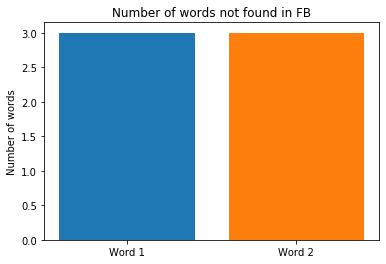

In [16]:
fig , ax = plt.subplots()

ax.bar(   'Word 1'  , len(given_data[given_data['English Word 1 AL1'] == '']) )
ax.bar(   'Word 2'  , len(given_data[given_data['English Word 2 AL1'] == '']))

# ax.legend()

plt.title('Number of words not found in FB')
# plt.xlabel('Number of Time words not found in wordnet')
plt.ylabel('Number of words')
plt.show()

In [17]:
print ( "Number of pairs having 0 similarity = " ,len(given_data[given_data['Jaccard A1'] == 0]))
print ( "Number of pairs having similarity except 0 = " ,len(given_data[given_data['Jaccard A1'] != 0]))

Number of pairs having 0 similarity =  998
Number of pairs having similarity except 0 =  2


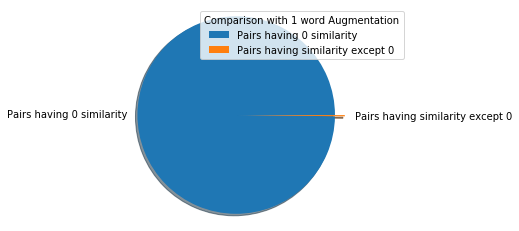

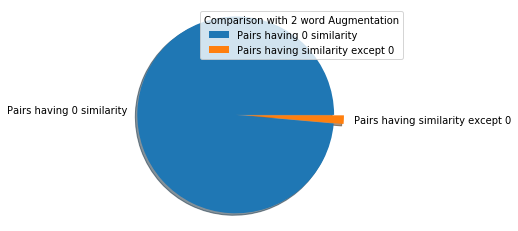

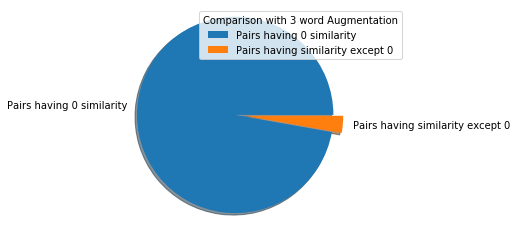

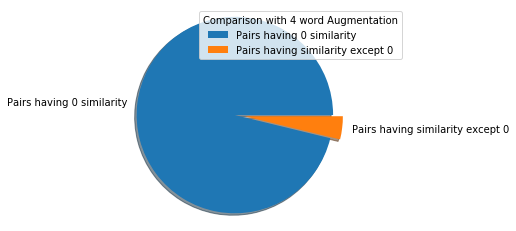

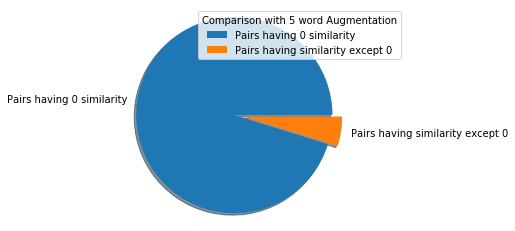

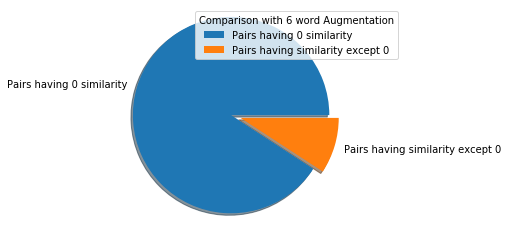

In [18]:
for i in range(1, 7):
    labels_text = ['Pairs having 0 similarity' , 'Pairs having similarity except 0']
    values = [len(given_data[given_data['Jaccard A' + str(i)] == 0]) , 
             len(given_data[given_data['Jaccard A' + str(i)] != 0])]
    explode_value = [0 , 0.1]
    plt.pie(values , explode = explode_value , labels = labels_text , shadow = True, startangle = 0 )
    plt.axis('equal')
    plt.legend(title = "Comparison with " + str(i)+ " word Augmentation")
    plt.show()

In [19]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from beautifultable import BeautifulTable

In [20]:
table = BeautifulTable()
table.column_headers = ["Data", "Number of zero similarity", "Number of non zero similarity"]
print("FB Pre-Trained")
print("Similarty using Jaccard")
for i in range(1 , 7):
    table.append_row([str(i) + " Word Augmentation",
                     len(given_data[given_data['Jaccard A' + str(i)] == 0]),
                     len(given_data[given_data['Jaccard A' + str(i)] != 0])])
print(table)

FB Pre-Trained
Similarty using Jaccard
+---------------------+-------------------------+------------------------------+
|        Data         | Number of zero similari | Number of non zero similarit |
|                     |           ty            |              y               |
+---------------------+-------------------------+------------------------------+
| 1 Word Augmentation |           998           |              2               |
+---------------------+-------------------------+------------------------------+
| 2 Word Augmentation |           986           |              14              |
+---------------------+-------------------------+------------------------------+
| 3 Word Augmentation |           972           |              28              |
+---------------------+-------------------------+------------------------------+
| 4 Word Augmentation |           962           |              38              |
+---------------------+-------------------------+---------------------

In [21]:
table = BeautifulTable()
table.column_headers = ["Data", "Jaccard", "Dice" , "Overlap" , "Containment"]
print("FB Pre-Trained")
print("Pearson Correlation COffiecent")
for i in range (1, 7):
    table.append_row([str(i) + " Word Augmentation", 
                      pearsonr(list(given_data["score"]), list(given_data["Jaccard A" + str(i)]))[0],
                      pearsonr(list(given_data["score"]), list(given_data["Dice A" + str(i)]))[0],
                      pearsonr(list(given_data["score"]), list(given_data["Overlap A" + str(i)]))[0],
                      pearsonr(list(given_data["score"]), list(given_data["Containment A" + str(i)]))[0]
                     ])
#     corr_j, p_value = pearsonr(list(given_data["score"]), list(given_data["Jaccard A" + str(i)]))
#     print("Pearson Corelation  =  " , corr ,"\n" ,"P-Value  =  " , p_value)
print(table)

FB Pre-Trained
Pearson Correlation COffiecent
+---------------------+---------+--------+---------+-------------+
|        Data         | Jaccard |  Dice  | Overlap | Containment |
+---------------------+---------+--------+---------+-------------+
| 1 Word Augmentation | -0.057  | -0.057 | -0.057  |   -0.057    |
+---------------------+---------+--------+---------+-------------+
| 2 Word Augmentation |  0.027  | 0.051  |  0.051  |    0.051    |
+---------------------+---------+--------+---------+-------------+
| 3 Word Augmentation |  0.136  | 0.149  |  0.151  |    0.149    |
+---------------------+---------+--------+---------+-------------+
| 4 Word Augmentation |  0.157  | 0.178  |  0.18   |    0.177    |
+---------------------+---------+--------+---------+-------------+
| 5 Word Augmentation |  0.176  | 0.202  |  0.205  |    0.202    |
+---------------------+---------+--------+---------+-------------+
| 6 Word Augmentation |  0.244  | 0.267  |  0.269  |    0.267    |
+---------------

In [22]:
given_data = pd.read_excel('dataset with similarity score after augmenting with FB pre trained 1_2_3_4_5.xlsx')
given_data

,Unnamed: 0,Word 1,Word 2,score,Word 2 Translation,English Word 1 AL1,English Word 2 AL1,Jaccard A1,Dice A1,Overlap A1,...,Jaccard A5,Dice A5,Overlap A5,Containment A5,English Word 1 AL6,English Word 2 AL6,Jaccard A6,Dice A6,Overlap A6,Containment A6
0,0,Joule,خلائی جہاز,0.58,spacecraft,joules,spacecrafts,0,0,0,...,0.0,0.0,0.0,0.0,"watt-hours,coulombs,microjoules,megajoules,gig...","spacecrafts,spaceship,astronauts,spaceplanes,o...",0.000000,0.0,0.0,0.0
1,1,Promised Land,باکو,0.42,Baku,nagarmehsanavadodaraanandbhavnagarkachchhsabar...,sakuya,0,0,0,...,0.0,0.0,0.0,0.0,deky4m0bspuotpnspkul5i0gtsnri4jmepcafaoxiofnx5...,"yukari,sakuya,kaori,kurama,kaguya,orochi,oni,r...",0.000000,0.0,0.0,0.0
2,2,car,سائیکل,2.83,bicycle,cars,bike,0,0,0,...,0.0,0.0,0.0,0.0,"vehicle,car.it,car.when,car.but,car--and,autom...","bicycling,bicycle-,bike,bicyle,bicycles,push-b...",0.000000,0.0,0.0,0.0
3,3,polyhedron,اداکار,0.00,actor,polyhedra,actress,0,0,0,...,0.0,0.0,0.0,0.0,"polytopes,polyhedra,polyhedrons,cuboctahedron,...","character-actor,actor.he,actors,actress,actor....",0.000000,0.0,0.0,0.0
4,4,multiple sclerosis,ایم ایس,3.92,MS,deky4m0bspuotpnspkul5i0gtsnri4jmepcafaoxiofnx5...,μs,0,0,0,...,0.0,0.0,0.0,0.0,deky4m0bspuotpnspkul5i0gtsnri4jmepcafaoxiofnx5...,"microsec,millisec,µs,μs,msec,ns,usec,nsec",0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,performance,نقش,2.42,cameo,perfomance,cameos,0,0,0,...,0.0,0.0,0.0,0.0,"performance.the,performance.this,peformance,pe...","cameoing,reprise,guest-appearance,cameos,cameo...",0.000000,0.0,0.0,0.0
996,996,term,سمسٹر,3.83,semester,term.,semesters,0,0,0,...,0.0,0.0,0.0,0.0,"term.a,term.this,term.,term-,term.the,term.if,...","semster,semesters,half-semester,semester.the,m...",0.000000,0.0,0.0,0.0
997,997,citrus,مالٹا,3.00,orange,citrusy,yellow,0,0,0,...,0.0,0.0,0.0,0.0,"non-citrus,citrusy,citrus-like,citrus-y,citris...","purple,orange-colored,blue,red,yellow,orangy,t...",0.210526,0.4,0.4,0.4
998,998,global warming,گلیشیئر,1.58,glacier,diseasedehydrationdiaphragmatic,glaciers,0,0,0,...,0.0,0.0,0.0,0.0,worldbfhinditranslatetranslationchappalpractic...,"icecap,snowfield,ice-sheets,icefields,ice-cap,...",0.000000,0.0,0.0,0.0


In [23]:
table = BeautifulTable()
table.column_headers = ["Data", "Jaccard", "Dice" , "Overlap" , "Containment"]
print("Spearman Correlation COffiecent")
for i in range (1, 7):
    table.append_row([str(i) + " Word Augmentation", 
                      spearmanr(list(given_data["score"]), list(given_data["Jaccard A" + str(i)]))[0],
                      spearmanr(list(given_data["score"]), list(given_data["Dice A" + str(i)]))[0],
                      spearmanr(list(given_data["score"]), list(given_data["Overlap A" + str(i)]))[0],
                      spearmanr(list(given_data["score"]), list(given_data["Containment A" + str(i)]))[0]
                     ])
#     corr_j, p_value = pearsonr(list(given_data["score"]), list(given_data["Jaccard A" + str(i)]))
#     print("Pearson Corelation  =  " , corr ,"\n" ,"P-Value  =  " , p_value)
print(table)

Spearman Correlation COffiecent
+---------------------+---------+--------+---------+-------------+
|        Data         | Jaccard |  Dice  | Overlap | Containment |
+---------------------+---------+--------+---------+-------------+
| 1 Word Augmentation | -0.052  | -0.052 | -0.052  |   -0.052    |
+---------------------+---------+--------+---------+-------------+
| 2 Word Augmentation |  0.087  | 0.087  |  0.087  |    0.087    |
+---------------------+---------+--------+---------+-------------+
| 3 Word Augmentation |  0.185  | 0.185  |  0.185  |    0.185    |
+---------------------+---------+--------+---------+-------------+
| 4 Word Augmentation |  0.231  | 0.231  |  0.231  |    0.231    |
+---------------------+---------+--------+---------+-------------+
| 5 Word Augmentation |  0.261  | 0.261  |  0.261  |    0.261    |
+---------------------+---------+--------+---------+-------------+
| 6 Word Augmentation |  0.327  | 0.327  |  0.327  |    0.327    |
+---------------------+-------

# Target only non empty sets

In [24]:
df_noNan =  given_data[given_data['English Word 1 AL6'].notnull()]
df_noNan.shape

(997, 41)

In [25]:
df_noNan =  df_noNan[df_noNan['English Word 2 AL6'].notnull()]
df_noNan.shape

(994, 41)

In [26]:
df_noNan

,Unnamed: 0,Word 1,Word 2,score,Word 2 Translation,English Word 1 AL1,English Word 2 AL1,Jaccard A1,Dice A1,Overlap A1,...,Jaccard A5,Dice A5,Overlap A5,Containment A5,English Word 1 AL6,English Word 2 AL6,Jaccard A6,Dice A6,Overlap A6,Containment A6
0,0,Joule,خلائی جہاز,0.58,spacecraft,joules,spacecrafts,0,0,0,...,0.0,0.0,0.0,0.0,"watt-hours,coulombs,microjoules,megajoules,gig...","spacecrafts,spaceship,astronauts,spaceplanes,o...",0.000000,0.0,0.0,0.0
1,1,Promised Land,باکو,0.42,Baku,nagarmehsanavadodaraanandbhavnagarkachchhsabar...,sakuya,0,0,0,...,0.0,0.0,0.0,0.0,deky4m0bspuotpnspkul5i0gtsnri4jmepcafaoxiofnx5...,"yukari,sakuya,kaori,kurama,kaguya,orochi,oni,r...",0.000000,0.0,0.0,0.0
2,2,car,سائیکل,2.83,bicycle,cars,bike,0,0,0,...,0.0,0.0,0.0,0.0,"vehicle,car.it,car.when,car.but,car--and,autom...","bicycling,bicycle-,bike,bicyle,bicycles,push-b...",0.000000,0.0,0.0,0.0
3,3,polyhedron,اداکار,0.00,actor,polyhedra,actress,0,0,0,...,0.0,0.0,0.0,0.0,"polytopes,polyhedra,polyhedrons,cuboctahedron,...","character-actor,actor.he,actors,actress,actor....",0.000000,0.0,0.0,0.0
4,4,multiple sclerosis,ایم ایس,3.92,MS,deky4m0bspuotpnspkul5i0gtsnri4jmepcafaoxiofnx5...,μs,0,0,0,...,0.0,0.0,0.0,0.0,deky4m0bspuotpnspkul5i0gtsnri4jmepcafaoxiofnx5...,"microsec,millisec,µs,μs,msec,ns,usec,nsec",0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,performance,نقش,2.42,cameo,perfomance,cameos,0,0,0,...,0.0,0.0,0.0,0.0,"performance.the,performance.this,peformance,pe...","cameoing,reprise,guest-appearance,cameos,cameo...",0.000000,0.0,0.0,0.0
996,996,term,سمسٹر,3.83,semester,term.,semesters,0,0,0,...,0.0,0.0,0.0,0.0,"term.a,term.this,term.,term-,term.the,term.if,...","semster,semesters,half-semester,semester.the,m...",0.000000,0.0,0.0,0.0
997,997,citrus,مالٹا,3.00,orange,citrusy,yellow,0,0,0,...,0.0,0.0,0.0,0.0,"non-citrus,citrusy,citrus-like,citrus-y,citris...","purple,orange-colored,blue,red,yellow,orangy,t...",0.210526,0.4,0.4,0.4
998,998,global warming,گلیشیئر,1.58,glacier,diseasedehydrationdiaphragmatic,glaciers,0,0,0,...,0.0,0.0,0.0,0.0,worldbfhinditranslatetranslationchappalpractic...,"icecap,snowfield,ice-sheets,icefields,ice-cap,...",0.000000,0.0,0.0,0.0


In [27]:
table = BeautifulTable()
table.column_headers = ["Data", "Jaccard", "Dice" , "Overlap" , "Containment"]
print("Pearson Correlation COffiecent")
for i in range (1, 7):
    table.append_row([str(i) + " Word Augmentation", 
                      pearsonr(list(df_noNan["score"]), list(( df_noNan["Jaccard A" + str(i)])))[0],
                      pearsonr(list(df_noNan["score"]), list(( df_noNan["Dice A" + str(i)])))[0],
                      pearsonr(list(df_noNan["score"]), list(( df_noNan["Overlap A" + str(i)])))[0],
                      pearsonr(list(df_noNan["score"]), list(( df_noNan["Containment A" + str(i)])))[0]
                     ])
#     corr_j, p_value = pearsonr(list(given_data["score"]), list(given_data["Jaccard A" + str(i)]))
#     print("Pearson Corelation  =  " , corr ,"\n" ,"P-Value  =  " , p_value)
print(table)

Pearson Correlation COffiecent
+---------------------+---------+--------+---------+-------------+
|        Data         | Jaccard |  Dice  | Overlap | Containment |
+---------------------+---------+--------+---------+-------------+
| 1 Word Augmentation | -0.057  | -0.057 | -0.057  |   -0.057    |
+---------------------+---------+--------+---------+-------------+
| 2 Word Augmentation |  0.027  | 0.051  |  0.051  |    0.051    |
+---------------------+---------+--------+---------+-------------+
| 3 Word Augmentation |  0.136  |  0.15  |  0.152  |    0.15     |
+---------------------+---------+--------+---------+-------------+
| 4 Word Augmentation |  0.158  | 0.178  |  0.18   |    0.178    |
+---------------------+---------+--------+---------+-------------+
| 5 Word Augmentation |  0.177  | 0.202  |  0.205  |    0.202    |
+---------------------+---------+--------+---------+-------------+
| 6 Word Augmentation |  0.245  | 0.268  |  0.27   |    0.268    |
+---------------------+--------

In [28]:
table = BeautifulTable()
table.column_headers = ["Data", "Jaccard", "Dice" , "Overlap" , "Containment"]
print("Spearman Correlation COffiecent")
for i in range (1, 7):
    table.append_row([str(i) + " Word Augmentation", 
                      spearmanr(list(df_noNan["score"]), list(  df_noNan["Jaccard A" + str(i)] ))[0],
                      spearmanr(list(df_noNan["score"]), list(  df_noNan["Dice A" + str(i)] ))[0],
                      spearmanr(list(df_noNan["score"]), list(  df_noNan["Overlap A" + str(i)] ))[0],
                      spearmanr(list(df_noNan["score"]), list(  df_noNan["Containment A" + str(i)] ))[0]
                     ])
#     corr_j, p_value = pearsonr(list(given_data["score"]), list(given_data["Jaccard A" + str(i)]))
#     print("Pearson Corelation  =  " , corr ,"\n" ,"P-Value  =  " , p_value)
print(table)

Spearman Correlation COffiecent
+---------------------+---------+--------+---------+-------------+
|        Data         | Jaccard |  Dice  | Overlap | Containment |
+---------------------+---------+--------+---------+-------------+
| 1 Word Augmentation | -0.052  | -0.052 | -0.052  |   -0.052    |
+---------------------+---------+--------+---------+-------------+
| 2 Word Augmentation |  0.087  | 0.087  |  0.087  |    0.087    |
+---------------------+---------+--------+---------+-------------+
| 3 Word Augmentation |  0.185  | 0.185  |  0.185  |    0.185    |
+---------------------+---------+--------+---------+-------------+
| 4 Word Augmentation |  0.231  | 0.231  |  0.231  |    0.231    |
+---------------------+---------+--------+---------+-------------+
| 5 Word Augmentation |  0.261  | 0.261  |  0.261  |    0.261    |
+---------------------+---------+--------+---------+-------------+
| 6 Word Augmentation |  0.328  | 0.328  |  0.328  |    0.328    |
+---------------------+-------